In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
df=pd.read_csv("/Users/samriddhikumari/Desktop/PYthon/Projects/NLP_srs/Label_Tickets.csv")
df

,Index,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,...,timely,complaint_what_happened,sub_issue,consumer_consent_provided,tokenized_complaint,tokenized_stopword_removed,complaint_1,lemmatized_complaint,POS_NN_PRN_JJ,Dominant_Topic
0,1,319xx,3229299,written notification about debt,2019-05-01t12:00:00-05:00,ga,NaN,debt collection,closed with explanation,jpmorgan chase & co.,...,yes,good morning my name is and i appreciate it i...,didn't receive enough information to verify debt,consent provided,"['good', 'morning', 'my', 'name', 'is', 'and',...","['good', 'morning', 'name', 'appreciate', 'cou...",good morning name appreciate could help put st...,good morning name appreciate could help put st...,good morning name stop chase bank cardmember s...,2
1,2,77069,3199379,"other features, terms, or problems",2019-04-02t12:00:00-05:00,tx,NaN,credit card or prepaid card,closed with explanation,jpmorgan chase & co.,...,yes,i upgraded my card in and was told by the ag...,problem with rewards from credit card,consent provided,"['i', 'upgraded', 'my', 'card', 'in', 'and', '...","['upgraded', 'card', 'told', 'agent', 'upgrade...",upgraded card told agent upgrade anniversary d...,upgrade card tell agent upgrade anniversary da...,upgrade card agent upgrade anniversary date ag...,2
2,10,104xx,3233499,incorrect information on your report,2019-05-06t12:00:00-05:00,ny,NaN,"credit reporting, credit repair services, or o...",closed with explanation,jpmorgan chase & co.,...,yes,chase card was reported on 2019 however fraudu...,information belongs to someone else,consent provided,"['chase', 'card', 'was', 'reported', 'on', '20...","['chase', 'card', 'reported', '2019', 'however...",chase card reported 2019 however fraudulent ap...,chase card report 2019 however fraudulent appl...,chase card report fraudulent application ident...,3
3,11,750xx,3180294,incorrect information on your report,2019-03-14t12:00:00-05:00,tx,NaN,"credit reporting, credit repair services, or o...",closed with explanation,jpmorgan chase & co.,...,yes,on while trying to book a ticket i came a...,information belongs to someone else,consent provided,"['on', 'while', 'trying', 'to', 'book', 'a', '...","['trying', 'book', 'ticket', 'came', 'across',...",trying book ticket came across offer 30000 app...,try book ticket come across offer 30000 apply ...,book ticket offer ticket reward card informati...,2
4,14,920xx,3224980,managing an account,2019-04-27t12:00:00-05:00,ca,NaN,checking or savings account,closed with explanation,jpmorgan chase & co.,...,yes,my grand son give me check for 160000 i deposi...,funds not handled or disbursed as instructed,consent provided,"['my', 'grand', 'son', 'give', 'me', 'check', ...","['grand', 'son', 'give', 'check', '160000', 'd...",grand son give check 160000 deposit chase acco...,grand son give check 160000 deposit chase acco...,grand son check deposit chase account fund cle...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21067,78303,281xx,3094545,"advertising and marketing, including promotion...",2018-12-07t12:00:00-05:00,nc,NaN,credit card or prepaid card,closed with explanation,jpmorgan chase & co.,...,yes,after being a chase card customer for well ove...,didn't receive advertised or promotional terms,consent provided,"['after', 'being', 'a', 'chase', 'card', 'cust...","['chase', 'card', 'customer', 'well', 'decade'...",chase card customer well decade offered multip...,chase card customer well decade offer multiple...,chase card customer decade multiple solicitati...,2
21068,78309,934xx,3091984,"other features, terms, or problems",2018-12-05t12:00:00-05:00,ca,NaN,credit card or prepaid card,closed with monetary relief,jpmorgan chase & co.,...,yes,on wednesday i called chas my visa credit ca...,other problem,consent provided,"['on', 'wednesday', 'i', 'called', 'chas', 'my...","['wednesday', 'called', 'chas', 'visa', 'credi...",wednesday called chas visa 

In [60]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


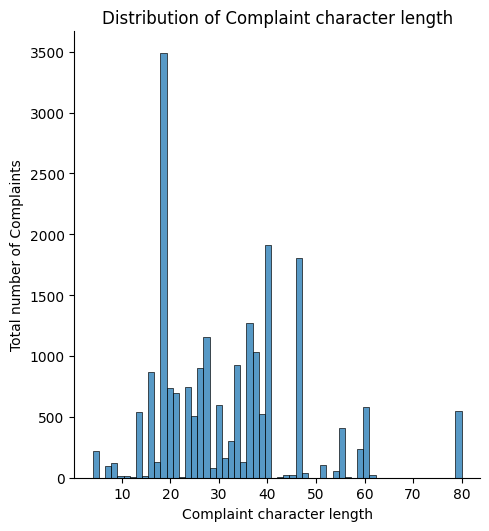

In [61]:
#bargraph of complaint lengths
char_len = [len(each_sent) for each_sent in df['issue']]
sns.displot(char_len, kind='hist', bins=60)
plt.xlabel("Complaint character length")
plt.ylabel("Total number of Complaints")
plt.title("Distribution of Complaint character length")
plt.show()

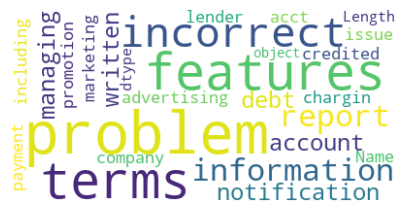

In [62]:
#word cloud of the 40 most used words in the complaints
stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=60, max_words=40, 
                      background_color="white", random_state=100, 
                      stopwords=stopwords).generate(str(df['issue']))
plt.figure(figsize=[5,7])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [63]:
#function to get n-grams
def get_top_ngrams(text, n=None, ngram=(1,1)):
  vec = CountVectorizer(stop_words='english', ngram_range=ngram).fit(text)
  bagofwords = vec.transform(text)
  sum_words = bagofwords.sum(axis=0)
  words_frequency = [(word, sum_words[0, index]) for word, index in vec.vocabulary_.items()]
  words_frequency = sorted(words_frequency, key = lambda x: x[1], reverse=True)
  return words_frequency[:n]

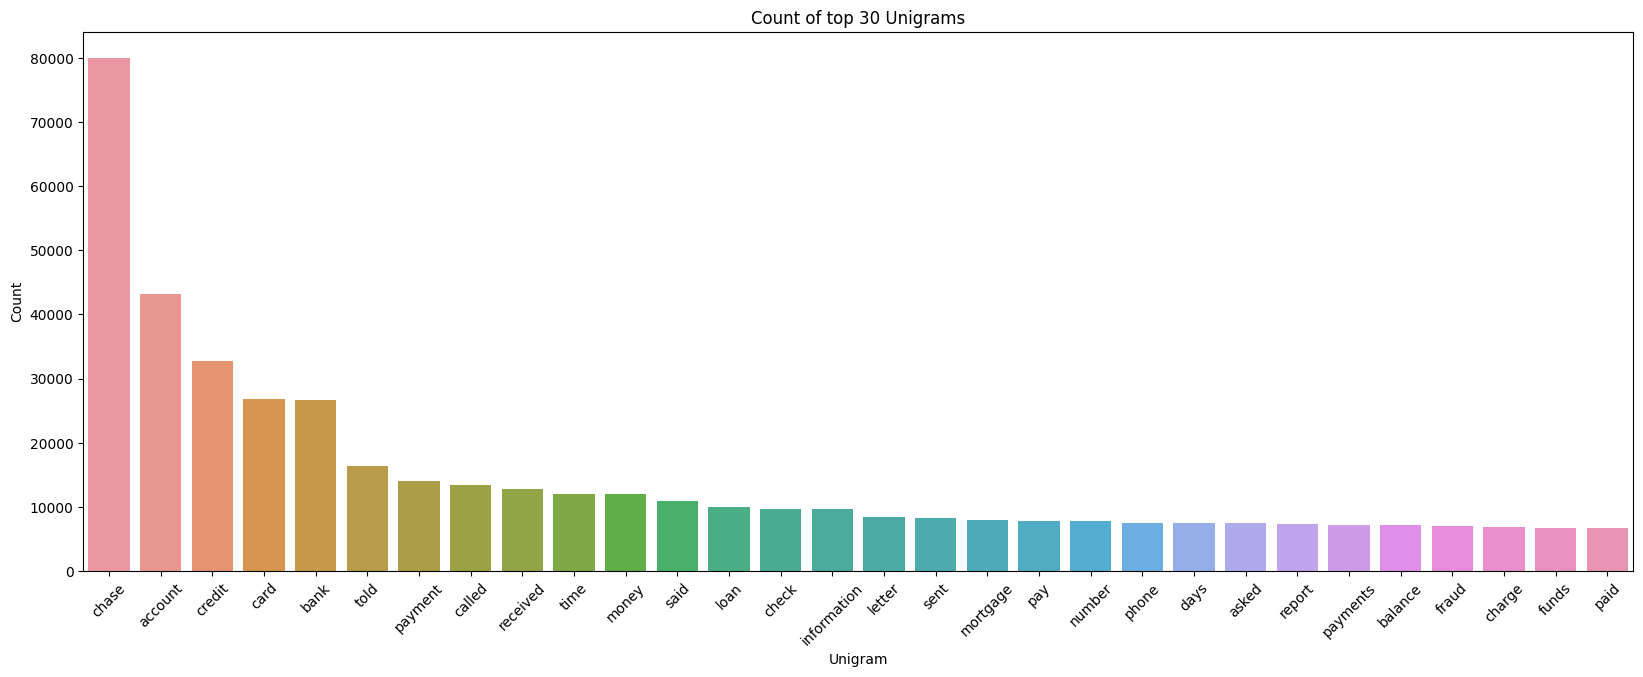

In [64]:
#finding and printing the top 30 UNIGRAMS
top_30words = get_top_ngrams(df['complaint_1'].values.astype('U'), n=30, ngram=(1,1))
df_unigram = pd.DataFrame(top_30words, columns=['unigram', 'count'])
plt.figure(figsize=[20,7])
sns.barplot(x=df_unigram['unigram'], y=df_unigram['count'])
plt.xticks(rotation=45)
plt.xlabel("Unigram")
plt.ylabel("Count")
plt.title("Count of top 30 Unigrams")
plt.show()

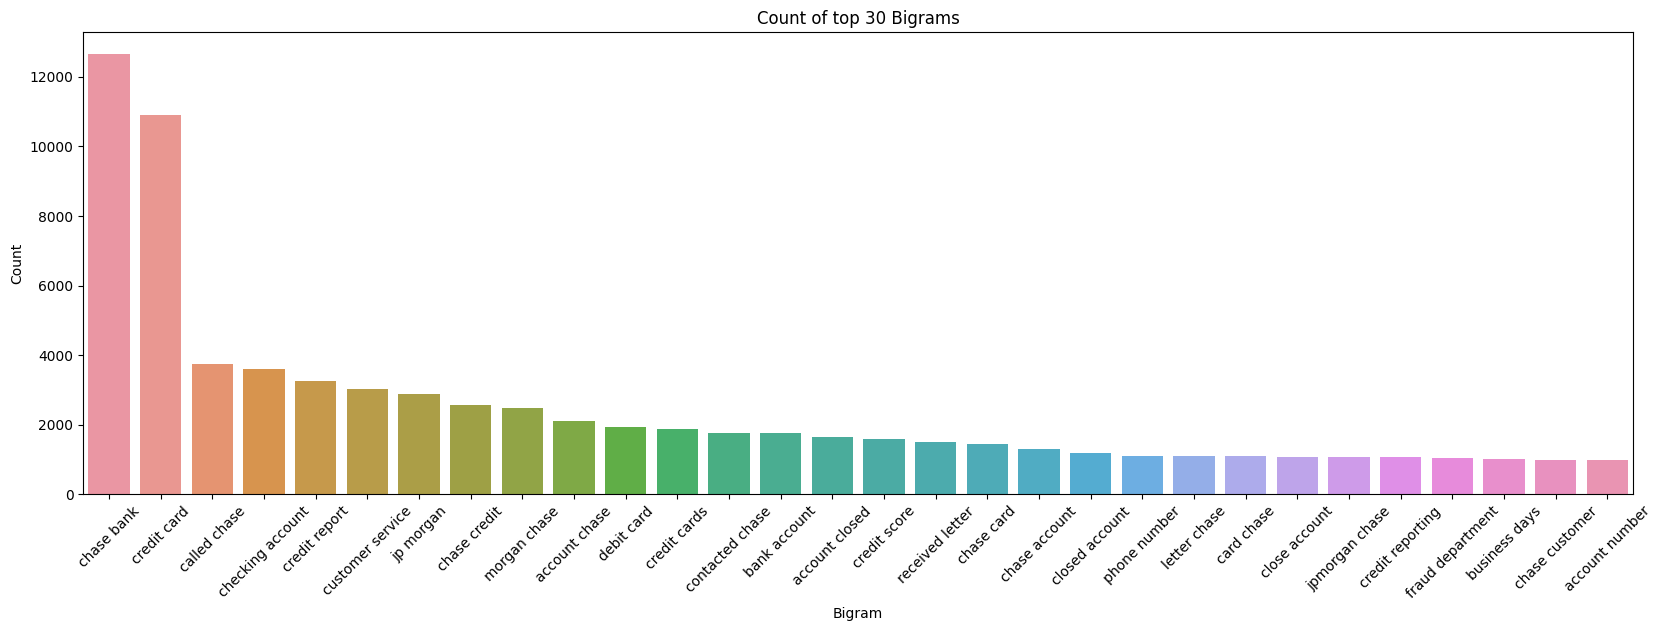

In [65]:
#finding and printing the top 30 BIGRAMS
top_30words = get_top_ngrams(df['complaint_1'].values.astype('U'), n=30, ngram=(2,2))
df_bigram = pd.DataFrame(top_30words, columns=['bigram', 'count'])
plt.figure(figsize=[20,6])
sns.barplot(x=df_bigram['bigram'], y=df_bigram['count'])
plt.xticks(rotation=45)
plt.xlabel("Bigram")
plt.ylabel("Count")
plt.title("Count of top 30 Bigrams")
plt.show()

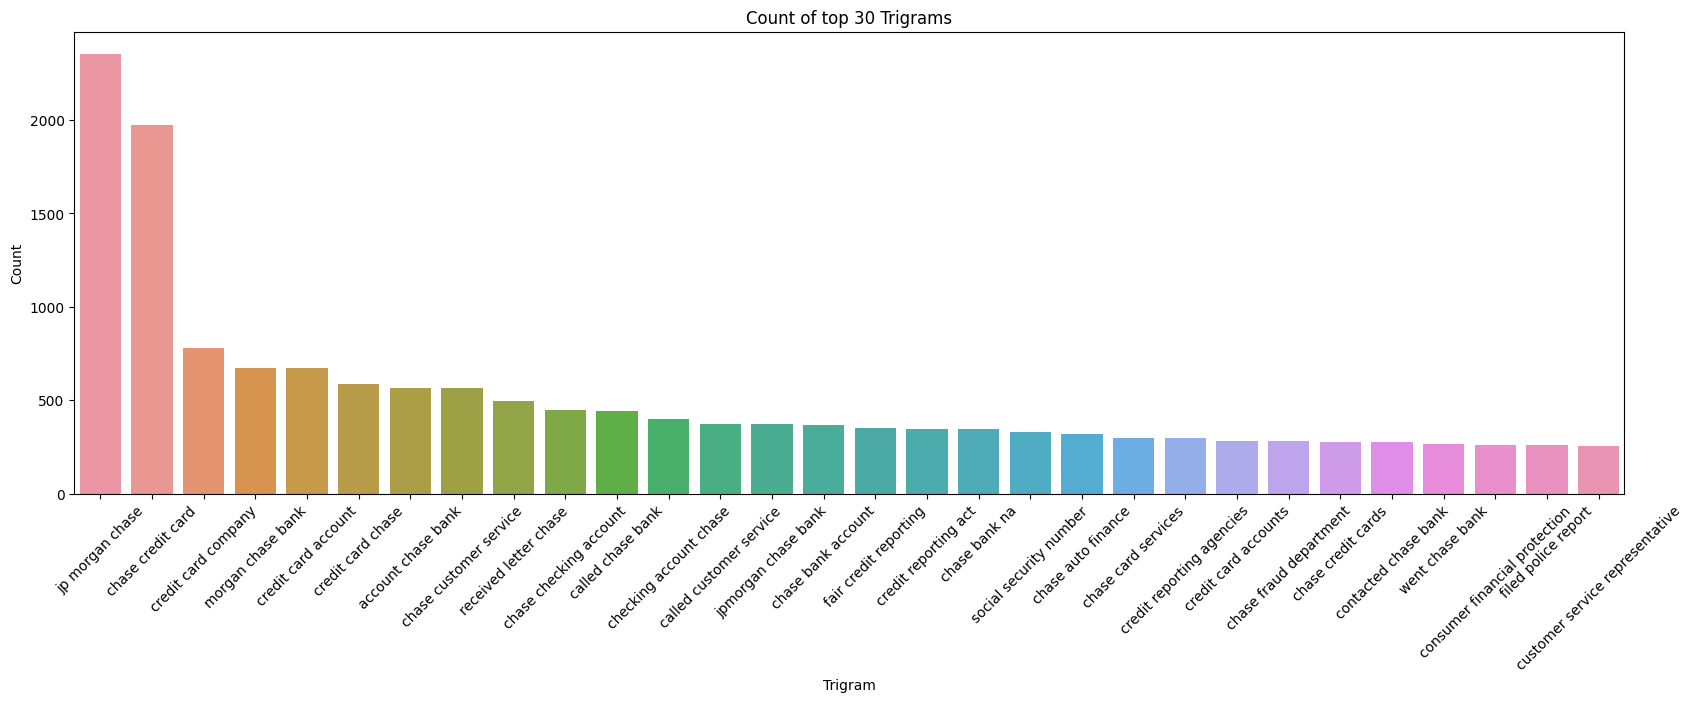

In [66]:
#finding and printing the top 30 TRIGRAMS
top_30words = get_top_ngrams(df['complaint_1'].values.astype('U'), n=30, ngram=(3,3))
df_trigram = pd.DataFrame(top_30words, columns=['trigram', 'count'])
plt.figure(figsize=[20,6])
sns.barplot(x=df_trigram['trigram'], y=df_trigram['count'])
plt.xticks(rotation=45)
plt.xlabel("Trigram")
plt.ylabel("Count")
plt.title("Count of top 30 Trigrams")
plt.show()                         